In [1]:
import gdr2_completeness.tap_queries as tap
import gdr2_completeness.data_manipulation as dr2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
## example how to query source_id and gmag and parallax for all sources that are brighter than g=12
Select_what =   """source_id as sid,
                   phot_g_mean_mag as g,
                   parallax as p"""
under_condition = """AND phot_g_mean_mag < 12"""
folder = 'data/tutorial/catalogue_query/'
hpx_level = 1
service = 'GDR2light'

# First we test the query and only download 1 hpx file
tap.tap_query_gdr2_hpx_sliced(service = service, hpx_level = hpx_level, folder = folder,
                              Select_what = Select_what, under_condition = under_condition,
                              verbose = True, test_1st_hpx_only=True)

Healpix level, gaia_factor, #healpixels
1 144115188075855872 48
Only the first healpix will be queried. If you want to download all set "test_1st_hpx_only" to "False".
folder did not exist before, is created now
number of attempt: 1
number of files in folder: 0
number of hpx chunks: 1
0 added to the job list
total ADQL queries to download: 1


all files have been successfully downloaded to data/tutorial/catalogue_query/


In [4]:
# Now we can download all hpx chunks
tap.tap_query_gdr2_hpx_sliced(service = service, hpx_level = hpx_level, folder = folder,
                              Select_what = Select_what, under_condition = under_condition,
                              verbose = True, test_1st_hpx_only=False)

Healpix level, gaia_factor, #healpixels
1 144115188075855872 48
folder existed and existing files will not be queried again
number of attempt: 1
number of files in folder: 0
number of hpx chunks: 48
0 is already queried
1 added to the job list
2 added to the job list
3 added to the job list
4 added to the job list
5 added to the job list
6 added to the job list
7 added to the job list
8 added to the job list
9 added to the job list
10 added to the job list
11 added to the job list
12 added to the job list
13 added to the job list
14 added to the job list
15 added to the job list
16 added to the job list
17 added to the job list
18 added to the job list
19 added to the job list
20 added to the job list
21 added to the job list
22 added to the job list
23 added to the job list
24 added to the job list
25 added to the job list
26 added to the job list
27 added to the job list
28 added to the job list
29 added to the job list
30 added to the job list
31 added to the job list
32 added to th

16 / 47 done
20 / 47 done
26 / 47 done
27 / 47 done
28 / 47 done
29 / 47 done
33 / 47 done
35 / 47 done
38 / 47 done
39 / 47 done
41 / 47 done
43 / 47 done
46 / 47 done
all files have been successfully downloaded to data/tutorial/catalogue_query/


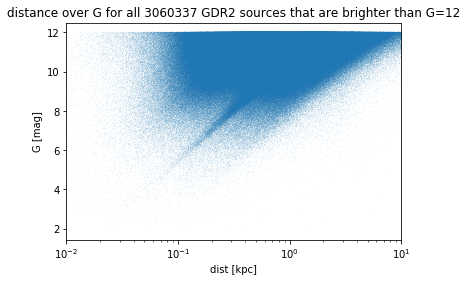

In [3]:
# Here we combine the files to one structured array
tap.stack_healpix_files(folder)

# And plot (part of) the retrieved data
x = np.load(folder + 'result.npy')
plt.plot(np.divide(1,x['p']),x['g'],',',alpha = 0.05)
plt.xlim((0.01,10))
plt.xscale('log')
plt.xlabel('dist [kpc]')
plt.ylabel('G [mag]')
plt.title('distance over G for all %d GDR2 sources that are brighter than G=12' %(len(x)))
plt.show()